In [1]:
import pandas as pd
house_price = pd.read_csv("housing_price.csv")

In [2]:
house_price

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [14]:
coefficient = [[0 for i in range(13)] for i in range(13)]
coefficient

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [15]:
from tqdm import tqdm
import statistics as st
import numpy as np
label = []
count1 = -1
for col1 in house_price.columns:
    if type(house_price[col1][0])==np.float64 or type(house_price[col1][0])==np.int64:
        count1 +=1
        label.append(col1)
        count2 = -1
        for col2 in house_price.columns:
            if type(house_price[col2][0])==np.float64 or type(house_price[col2][0])==np.int64:
                count2+=1
                col1_mean = st.mean(house_price[col1])
                col2_mean = st.mean(house_price[col2])
                col1_col2_var = 0
                col1_var = 0
                col2_var = 0
                for iterator in range(len(house_price[col1])):
                    col1_col2_var +=(house_price[col1][iterator]-col1_mean)*(house_price[col2][iterator]-col2_mean)
                    col1_var += (house_price[col1][iterator]-col1_mean)**2
                    col2_var += (house_price[col2][iterator]-col2_mean)**2
                r_coefficient = col1_col2_var/(col1_var*col2_var)**(1/2)
                coefficient[count1][count2]=r_coefficient
                print("Pearson cofficient between {} and {} is {}".format(col1,col2,r_coefficient))

Pearson cofficient between price and price is 1.0
Pearson cofficient between price and bedrooms is 0.20033628937567527
Pearson cofficient between price and bathrooms is 0.32710991828773556
Pearson cofficient between price and sqft_living is 0.4304100254326292
Pearson cofficient between price and sqft_lot is 0.05045129503234898
Pearson cofficient between price and floors is 0.15146080053677977
Pearson cofficient between price and waterfront is 0.13564832245848418
Pearson cofficient between price and view is 0.22850417280566584
Pearson cofficient between price and condition is 0.034914537326412934
Pearson cofficient between price and sqft_above is 0.3675696016004266
Pearson cofficient between price and sqft_basement is 0.21042657177482635
Pearson cofficient between price and yr_built is 0.021856830395478952
Pearson cofficient between price and yr_renovated is -0.028773645398858096
Pearson cofficient between bedrooms and price is 0.20033628937567527
Pearson cofficient between bedrooms and

Pearson cofficient between condition and yr_renovated is -0.1868184143968472
Pearson cofficient between sqft_above and price is 0.3675696016004266
Pearson cofficient between sqft_above and bedrooms is 0.48470534202814547
Pearson cofficient between sqft_above and bathrooms is 0.6899184083363774
Pearson cofficient between sqft_above and sqft_living is 0.8764432459511095
Pearson cofficient between sqft_above and sqft_lot is 0.2164546513744694
Pearson cofficient between sqft_above and floors is 0.5228137353198381
Pearson cofficient between sqft_above and waterfront is 0.07891112911345236
Pearson cofficient between sqft_above and view is 0.17432670794934704
Pearson cofficient between sqft_above and condition is -0.17819634440816062
Pearson cofficient between sqft_above and sqft_above is 1.0
Pearson cofficient between sqft_above and sqft_basement is -0.0387229898912813
Pearson cofficient between sqft_above and yr_built is 0.4085352065613155
Pearson cofficient between sqft_above and yr_renova

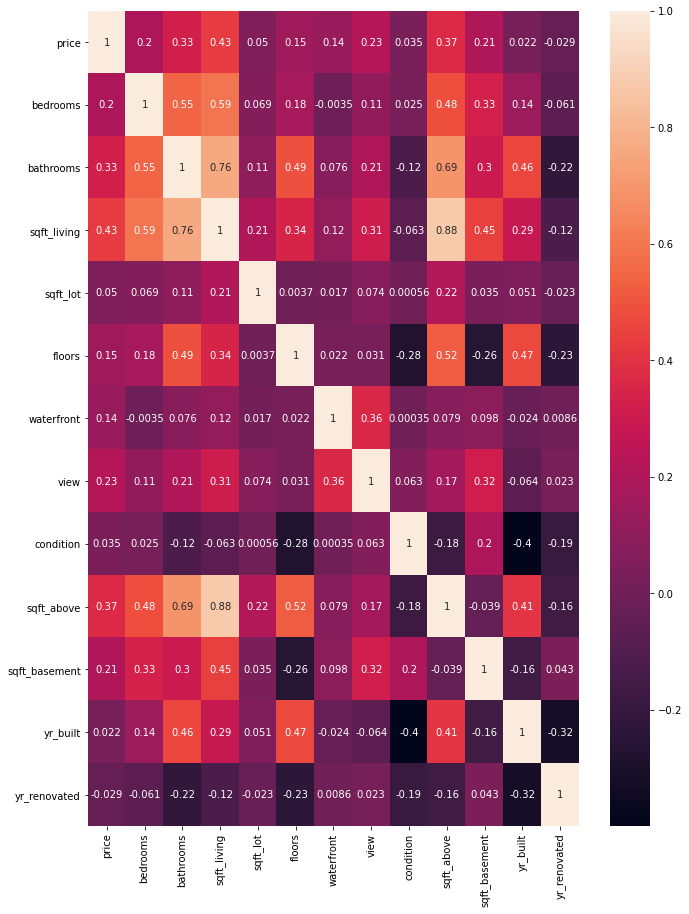

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11, 15))
sns.heatmap(data=coefficient,xticklabels=label, yticklabels=label,annot=True)
plt.show()

Conclusion - 

1. column with themselves have correlation coefficient of 1
2. sqft_living and sqft_basement have high correlation with price column
3. Unrelated column watefront and yr_renovated has low correlation

